In [1]:
%load_ext autoreload
%autoreload 2

# Add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Import the rest of our modules
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

%matplotlib inline

# Import py files
from src import cm_class_LRM as LRM # Logistic Regression Model Class
from src import cm_class_KNN as KNN # K-Nearest Neighbor Model Class

# Create paths to folders in repo
data_folder = '../../data/'
src_folder = '../../src/'

In [3]:
df=pd.read_csv('../../data/initial_clean_lc', index_col=[0])
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
le = LabelEncoder()
df['international_plan_binary'] = le.fit_transform(df['international_plan'])
df['voice_mail_plan_binary'] = le.fit_transform(df['international_plan'])
df['target'] = le.fit_transform(df['churn'])
# Class 0 is index 0 in this array: False 'no churn'
# Class 1 is index 1 in this array: True 'churn'
print(le.classes_)

df.head()

[False  True]
[False  True]
[False  True]


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_binary,voice_mail_plan_binary,target
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,0,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,0,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,1,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,1,0


In [5]:
df_location=pd.DataFrame()
df_location['state']=df.pop("state")
df_location['area_code']=df.pop("area_code")
df_plans=pd.DataFrame()
df_plans['international_plan']=df.pop('international_plan')
df_plans['voice_mail_plan']=df.pop('voice_mail_plan')
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_binary,voice_mail_plan_binary,target
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,1,0


In [6]:
df.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn', 'international_plan_binary', 'voice_mail_plan_binary',
       'target'],
      dtype='object')

In [7]:
X = df[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'international_plan_binary', 'voice_mail_plan_binary']]
y = df.target 

In [8]:
X

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_binary,voice_mail_plan_binary
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,1
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,1,1


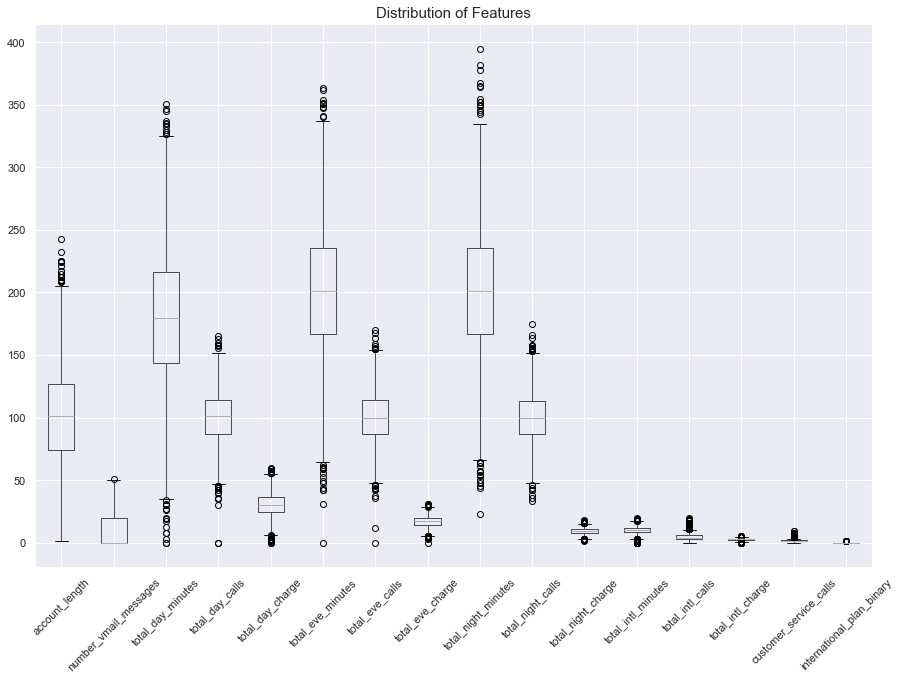

In [56]:
plt.figure(figsize=(15,10))
X.iloc[:,:-1].boxplot()
plt.title('Distribution of Features', fontsize=15)
plt.xticks(rotation=45)
plt.show()


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


# Other Libraries
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer, precision_score, recall_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.preprocessing import RobustScaler

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("\nTRAINING DATA")
print('Customers:',y_train.count())
print("churn %:", y_train.value_counts()[1]/y_train.count()*100)
print("Non-churn %:",y_train.value_counts()[0]/y_train.count()*100)

print("TESTING DATA")
print('Customers:',y_test.count())
print("Churn %:", y_test.value_counts()[1]/y_test.count()*100)
print("Non-churn %:", y_test.value_counts()[0]/y_test.count()*100)




TRAINING DATA
Customers: 2666
churn %: 14.328582145536384
Non-churn %: 85.67141785446361
TESTING DATA
Customers: 667
Churn %: 15.142428785607196
Non-churn %: 84.8575712143928



TRAINING DATA

cv recall scores: [0.67716535 0.6796875  0.72440945]
Mean score: 0.6937541010498688
TESTING DATA

Accuracy: 0.9160419790104948

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.72      0.72      0.72       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



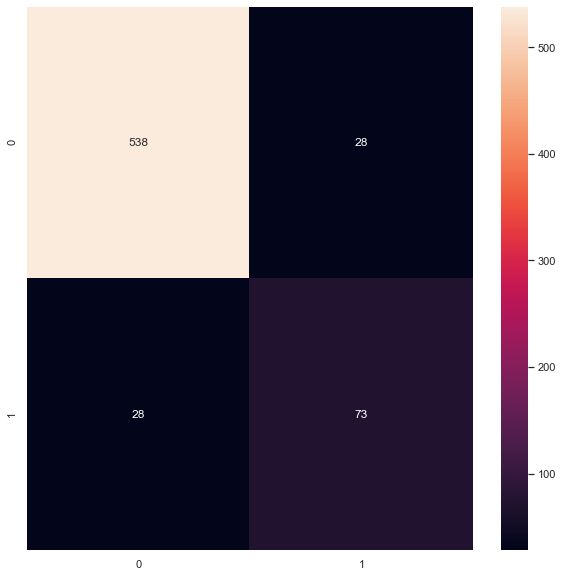

In [66]:
clf = DecisionTreeClassifier()

# Cross-validate on the train data
train_cv = cross_val_score(X=X_train,y=y_train,estimator=clf,cv=3,scoring="recall")
print("\nTRAINING DATA")
print("\ncv recall scores:",train_cv)
print("Mean score:",train_cv.mean())

# Now predict on the test group
print("TESTING DATA")
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("\nAccuracy:",clf.score(X_test,y_test))

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()

On the test set

- Of 101 churn cases in the test set, 73 were correctly labeled as churn. And 28 were mislabeled as non-churn.
- All but 28 non-churn cases were correctly labeled, from a total of 538. That's pretty good, but the priority should be to prevent churn and optimize recall.

Understanding the scores

Sensitivity (or Recall) is the percentage of positives correctly identified. We would like this as close to 1 as possible. Specificity is the opposite, the percentage of negatives correctly identified. Specificity will keep our model honest. If the predictions are all churn, there will be no false negatives but excessive false positives.

The confusion matrix and classification reports reveal that the high scores are likely a reflection of the class imbalance. 

In [67]:
X

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_binary,voice_mail_plan_binary
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,1
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,1,1


In [68]:
col_name="target"
first_col = df.pop(col_name)
df.insert(0, col_name, first_col)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     3333 non-null   int64  
 1   account_length             3333 non-null   int64  
 2   number_vmail_messages      3333 non-null   int64  
 3   total_day_minutes          3333 non-null   float64
 4   total_day_calls            3333 non-null   int64  
 5   total_day_charge           3333 non-null   float64
 6   total_eve_minutes          3333 non-null   float64
 7   total_eve_calls            3333 non-null   int64  
 8   total_eve_charge           3333 non-null   float64
 9   total_night_minutes        3333 non-null   float64
 10  total_night_calls          3333 non-null   int64  
 11  total_night_charge         3333 non-null   float64
 12  total_intl_minutes         3333 non-null   float64
 13  total_intl_calls           3333 non-null   int64

In [69]:
df.columns

Index(['target', 'account_length', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'international_plan_binary',
       'voice_mail_plan_binary'],
      dtype='object')

In [70]:
features = df[['target', 'account_length', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'international_plan_binary',
       'voice_mail_plan_binary']]

POSITIVE CORRELATIONS:
      target   total_day_minutes   0.20515082926138778
      target   total_day_charge   0.20515074317015172
      target   customer_service_calls   0.20874999878379205
      target   international_plan_binary   0.25985184734548417
      target   voice_mail_plan_binary   0.25985184734548417
NEGATIVE CORRELATIONS:


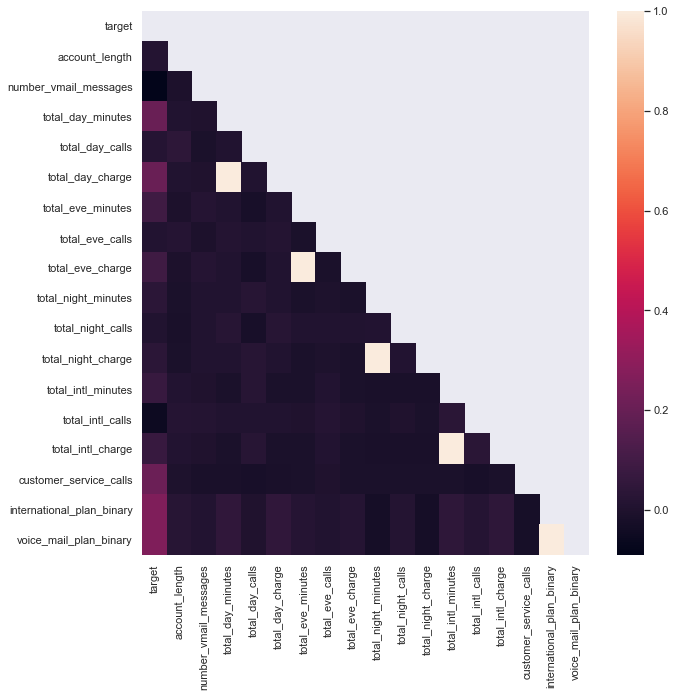

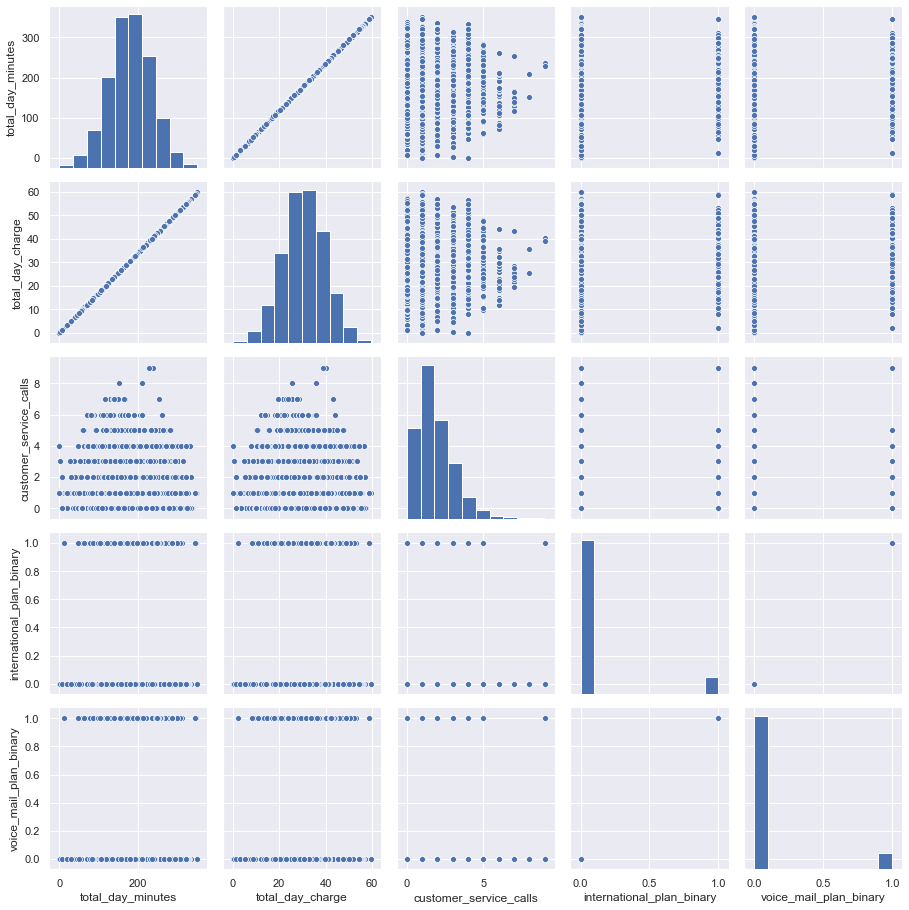

In [71]:
import seaborn as sns
th=0.2
sns.set(rc={'figure.figsize':(10, 10)})
mask = np.triu(np.ones_like(features.corr(), dtype=np.bool))
sns.heatmap(features.corr(), mask=mask);
corrMatrix = features.corr()
rows, cols = corrMatrix.shape
flds = list(corrMatrix.columns)
corr = features.corr().values
neg_corr = []
pos_corr = []
print ("POSITIVE CORRELATIONS:")
for j in range(1, cols):
    if corr[0,j] > th:
        print ('     ', flds[0], ' ', flds[j], ' ', corr[0,j])
        pos_corr.append(flds[j])
print ("NEGATIVE CORRELATIONS:")
for j in range(1, cols):
    if corr[0,j] < -th:
        print ('     ', flds[0], ' ', flds[j], ' ', corr[0,j])
        neg_corr.append(flds[j])
# Pair Plots
df_pos = features[pos_corr]
df_neg = features[neg_corr]
if pos_corr:
    sns.pairplot(df_pos)
if neg_corr:
    sns.pairplot(df_neg)

In [72]:
df_pos

,total_day_minutes,total_day_charge,customer_service_calls,international_plan_binary,voice_mail_plan_binary
0,265.1,45.07,1,0,0
1,161.6,27.47,1,0,0
2,243.4,41.38,0,0,0
3,299.4,50.90,2,1,1
4,166.7,28.34,3,1,1
...,...,...,...,...,...
3328,156.2,26.55,2,0,0
3329,231.1,39.29,3,0,0
3330,180.8,30.74,2,0,0
3331,213.8,36.35,2,1,1


In [73]:
# Define outcome and predictors USE FEATURE-ENGINEERED DATA
X = df_pos
y = features.target

# Split X and y into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_test

,total_day_minutes,total_day_charge,customer_service_calls,international_plan_binary,voice_mail_plan_binary
438,155.0,26.35,1,0,0
2674,109.1,18.55,0,0,0
1345,0.0,0.00,4,0,0
1957,212.8,36.18,1,0,0
2148,144.0,24.48,1,0,0
...,...,...,...,...,...
2577,185.1,31.47,2,0,0
2763,155.7,26.47,3,0,0
3069,158.7,26.98,1,0,0
1468,117.5,19.98,3,0,0


In [74]:
print("\nTRAINING DATA")
print('Customers:',y_train.count())
print("Churn %:",
      y_train.value_counts()[1]/y_train.count())
print("Non-Churn percentage:",
      y_train.value_counts()[0]/y_train.count())

print("TESTING DATA")
print('Customers:',y_test.count())
print("Churn %:",
      y_test.value_counts()[1]/y_test.count())
print("Non-Churn percentage:",
      y_test.value_counts()[0]/y_test.count())

TESTING DATA
Customers: 667
Churn %: 0.15142428785607195
Non-Churn percentage: 0.848575712143928

TRAINING DATA
Customers: 2666
Churn %: 0.14328582145536384
Non-Churn percentage: 0.8567141785446362



TRAINING DATA

Cross-validation recall scores: [0.41732283 0.375      0.46456693]
Mean recall score: 0.41896325459317585
TESTING DATA

Recall: 0.44554455445544555

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       566
           1       0.45      0.45      0.45       101

    accuracy                           0.83       667
   macro avg       0.68      0.67      0.67       667
weighted avg       0.83      0.83      0.83       667



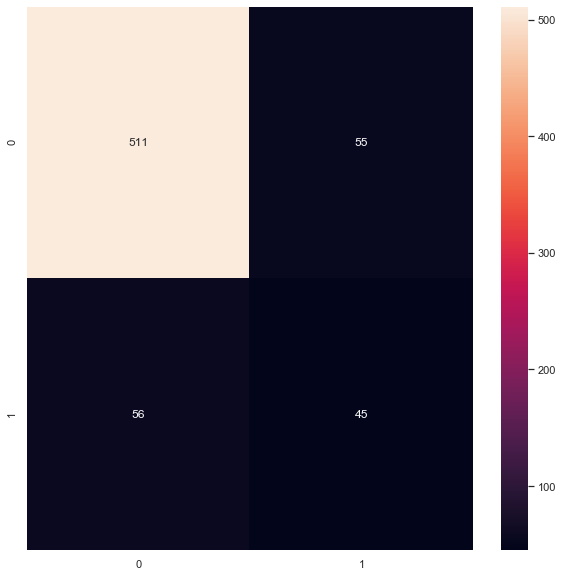

In [76]:
clf = DecisionTreeClassifier()

# Optimize for recall
recall = make_scorer(recall_score)


train_cv = cross_val_score(X=X_train,y=y_train,estimator=clf,scoring=recall,cv=3)
print("\nTRAINING DATA")
print("\nCross-validation recall scores:",train_cv)
print("Mean recall score:",train_cv.mean())

print("TESTING DATA")
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("\nRecall:",recall_score(y_test,y_pred))

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()

## Oversample Minority Class

In [77]:
X = features[['account_length', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'international_plan_binary',
       'voice_mail_plan_binary']]
y = features.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.utils import resample

In [80]:
train = X_train.join(y_train)

print('Customers before balancing:',train.shape)
print('\nOriginal training data count:')
print(train.target.value_counts())

Customers before balancing: (2666, 18)

Original training data count:
0    2284
1     382
Name: target, dtype: int64


In [81]:
# Separate majority and minority classes
df_majority = train[train.target==0]
df_minority = train[train.target==1]
 
# Oversample minority class
df_minority_os = resample(df_minority, replace=True, n_samples=2284, random_state=42)

# Combine
df_os = pd.concat([df_majority, df_minority_os])
 
# New class counts
df_os.target.value_counts()

X_train_bal = df_os[['account_length', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'international_plan_binary',
       'voice_mail_plan_binary']]
y_train_bal = df_os.target

TRAINING DATA

Cross-validation recall scores: [0.9934297  0.99475066 0.99737188]
Mean recall score: 0.9951840776801717

TESTING DATA

Recall: 0.6336633663366337

Classification report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       566
           1       0.67      0.63      0.65       101

    accuracy                           0.90       667
   macro avg       0.80      0.79      0.80       667
weighted avg       0.90      0.90      0.90       667



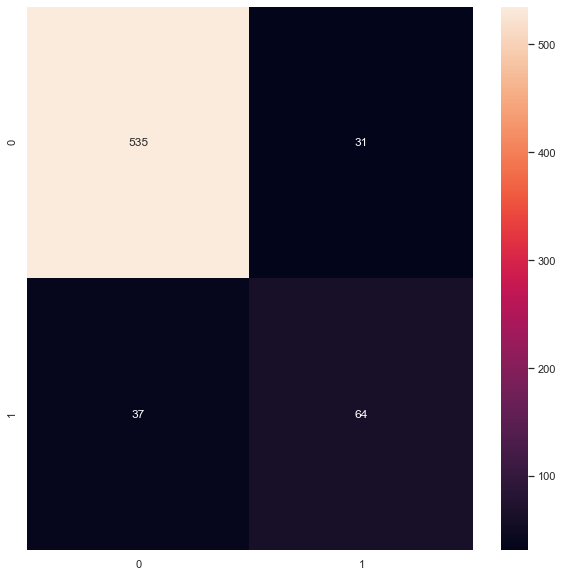

In [83]:
clf = DecisionTreeClassifier()
recall = make_scorer(recall_score)

train_cv = cross_val_score(X=X_train_bal,y=y_train_bal,estimator=clf,scoring=recall,cv=3)
print("TRAINING DATA")
print("\nCross-validation recall scores:",train_cv)
print("Mean recall score:",train_cv.mean())

# Now predict on the test group
print("\nTESTING DATA")
y_pred = clf.fit(X_train_bal, y_train_bal).predict(X_test)
print("\nRecall:",recall_score(y_test,y_pred))

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()

In [84]:
performance = pd.DataFrame(columns=['Train_Recall','Test_Recall','Test_Specificity'])


 ---------------------------------------- 
 SVC 
 ----------------------------------------
TRAINING DATA


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa


Cross-validation recall scores: [0.92105263 0.9254386  0.8377193  0.74561404 0.87336245 0.72489083
 0.99126638 0.8558952  0.79824561 0.84649123]
Mean recall score: 0.8519976250670342

TESTING DATA

Recall: 0.8613861386138614


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


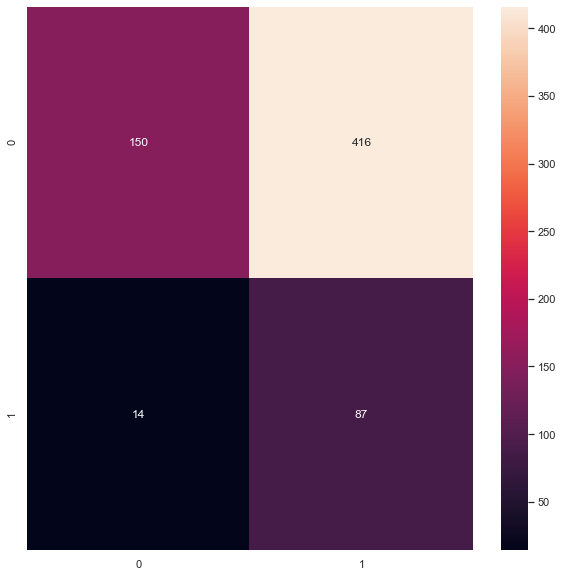


 ---------------------------------------- 
 LogisticRegression 
 ----------------------------------------
TRAINING DATA


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg


Cross-validation recall scores: [0.74122807 0.75       0.72368421 0.70175439 0.68122271 0.65502183
 0.72489083 0.70742358 0.76315789 0.75      ]
Mean recall score: 0.7198383513368575

TESTING DATA

Recall: 0.7326732673267327


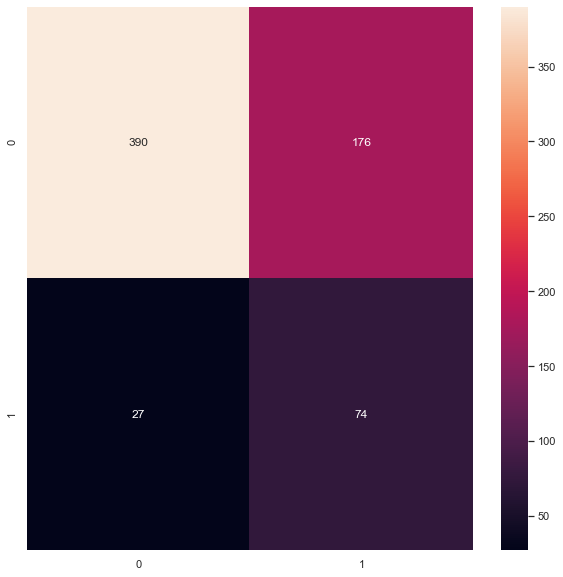


 ---------------------------------------- 
 DecisionTreeClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [1.         1.         1.         1.         1.         1.
 1.         1.         0.99122807 1.        ]
Mean recall score: 0.9991228070175439

TESTING DATA

Recall: 0.6435643564356436


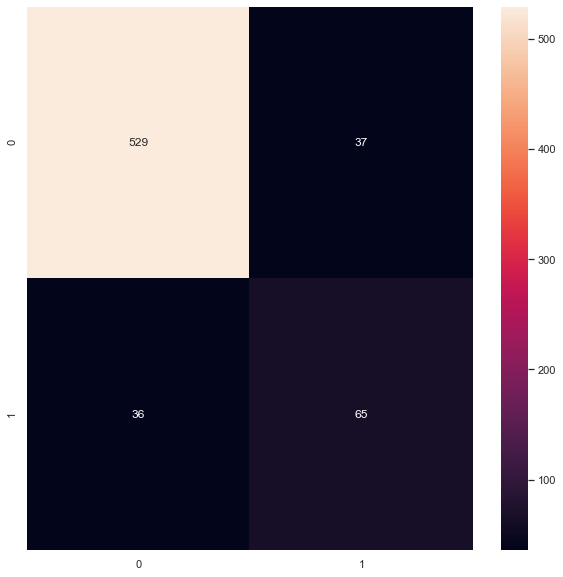


 ---------------------------------------- 
 KNeighborsClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.97368421 0.94736842 0.94736842 0.96052632 0.930131   0.96943231
 0.96069869 0.95196507 0.95175439 0.93421053]
Mean recall score: 0.9527139354937562

TESTING DATA

Recall: 0.5841584158415841


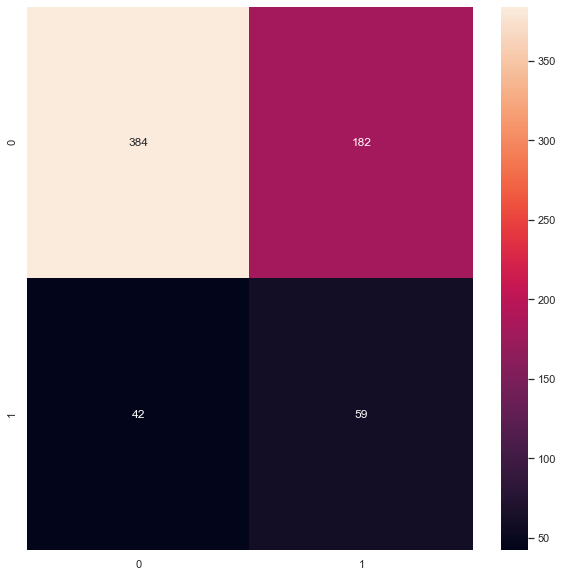


 ---------------------------------------- 
 RandomForestClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean recall score: 1.0

TESTING DATA

Recall: 0.7920792079207921


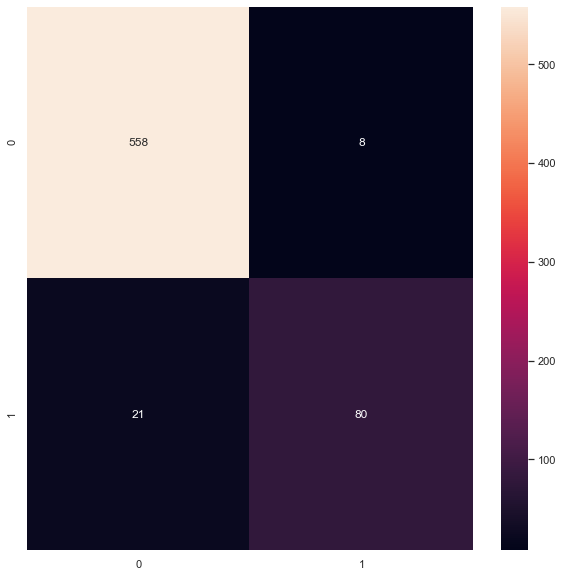


 ---------------------------------------- 
 AdaBoostClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.84210526 0.8377193  0.80701754 0.79824561 0.82532751 0.80349345
 0.83406114 0.8209607  0.84649123 0.89035088]
Mean recall score: 0.8305772619321228

TESTING DATA

Recall: 0.7920792079207921


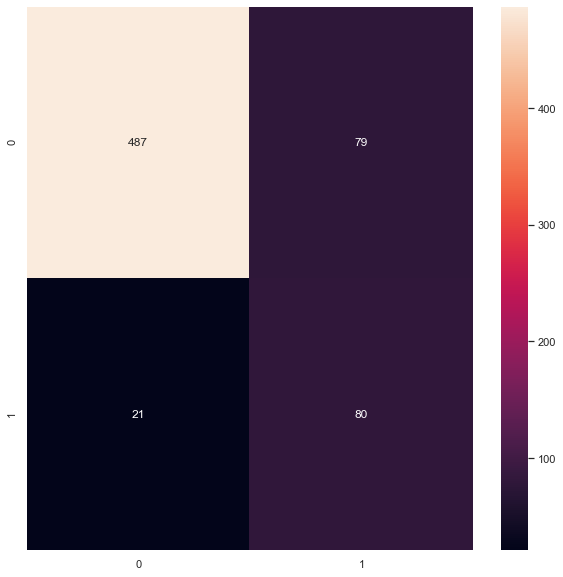


 ---------------------------------------- 
 GradientBoostingClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.87280702 0.89912281 0.88157895 0.86842105 0.88646288 0.86026201
 0.86026201 0.88209607 0.87719298 0.91666667]
Mean recall score: 0.8804872443116525

TESTING DATA

Recall: 0.8514851485148515


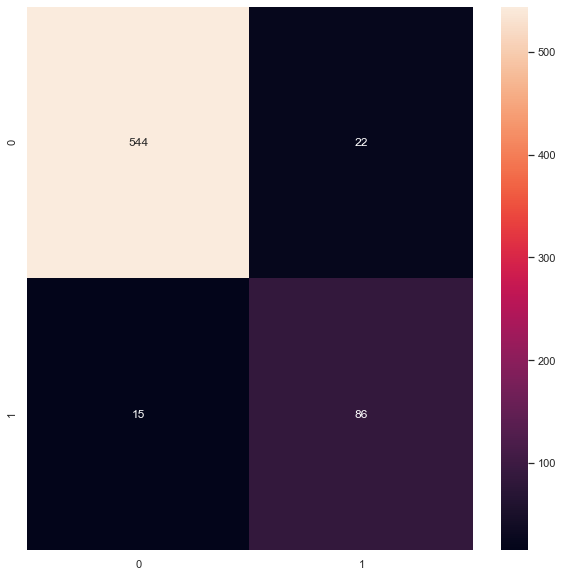

In [86]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier

# List of classifiers
classifiers = [SVC(max_iter=1000),LogisticRegression(),
               DecisionTreeClassifier(),KNeighborsClassifier(), 
               RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

# Compare each classifier
for clf in classifiers:    
    
    print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)
    
    print("TRAINING DATA")
    train_cv = cross_val_score(X=X_train_bal, y=y_train_bal, 
                               estimator=clf, scoring=recall,cv=10)
    print("\nCross-validation recall scores:",train_cv)
    print("Mean recall score:",train_cv.mean())

    print("\nTESTING DATA")
    y_pred = clf.fit(X_train_bal, y_train_bal).predict(X_test)
    print("\nRecall:",recall_score(y_test,y_pred))

    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix, annot=True,fmt='d')
    plt.show()
    
    # Store results
    performance.loc[clf.__class__.__name__+'_default',
                    ['Train_Recall','Test_Recall','Test_Specificity']] = [
        train_cv.mean(),
        recall_score(y_test,y_pred),
        conf_matrix[0,0]/conf_matrix[0,:].sum()
    ]

In [87]:
performance

,Train_Recall,Test_Recall,Test_Specificity
SVC_default,0.851998,0.861386,0.265018
LogisticRegression_default,0.719838,0.732673,0.689046
DecisionTreeClassifier_default,0.999123,0.643564,0.934629
KNeighborsClassifier_default,0.952714,0.584158,0.678445
RandomForestClassifier_default,1,0.792079,0.985866
AdaBoostClassifier_default,0.830577,0.792079,0.860424
GradientBoostingClassifier_default,0.880487,0.851485,0.961131


## Undersample Majority Class

In [88]:
X = features[['account_length', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'international_plan_binary',
       'voice_mail_plan_binary']]
y = features.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.utils import resample

In [91]:
train = X_train.join(y_train)

print('Customers before balancing:',train.shape)
print('\Training data churn count:')
print(train.target.value_counts())

Customers before balancing: (2666, 18)
\Training data churn count:
0    2284
1     382
Name: target, dtype: int64


In [92]:
# Separate majority and minority classes
df_majority = train[train.target==0]
df_minority = train[train.target==1]
 
# Undersample majority class
df_majority_us = resample(df_majority, replace=False, n_samples=382, random_state=42) 
 
# Combine minority class with undersampled majority class
df_us = pd.concat([df_majority_us, df_minority])

X_train_bal = df_us[['account_length', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'international_plan_binary',
       'voice_mail_plan_binary']]
y_train_bal = df_us.target

# Display new class counts
df_us.target.value_counts()

1    382
0    382
Name: target, dtype: int64

TRAINING DATA

Cross-validation recall scores: [0.79527559 0.7734375  0.79527559]
Mean recall score: 0.7879962270341206

TESTING DATA

Recall: 0.7920792079207921

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       566
           1       0.38      0.79      0.51       101

    accuracy                           0.77       667
   macro avg       0.67      0.78      0.68       667
weighted avg       0.87      0.77      0.80       667



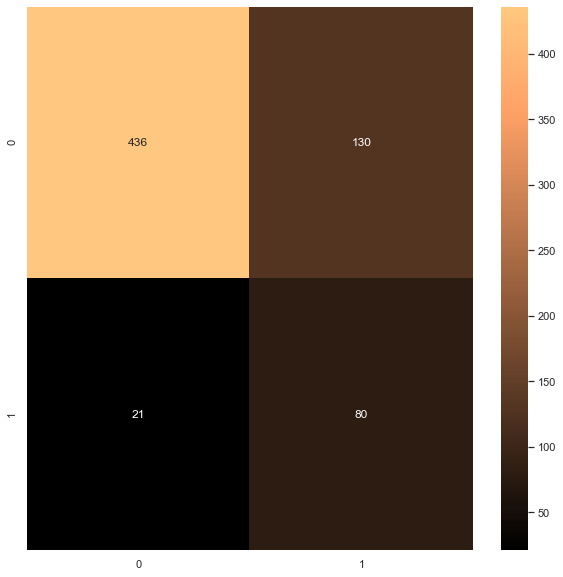

In [93]:
clf = DecisionTreeClassifier()
recall = make_scorer(recall_score)

train_cv = cross_val_score(X=X_train_bal,y=y_train_bal,estimator=clf,scoring=recall,cv=3)
print("TRAINING DATA")
print("\nCross-validation recall scores:",train_cv)
print("Mean recall score:",train_cv.mean())

print("\nTESTING DATA")
y_pred = clf.fit(X_train_bal, y_train_bal).predict(X_test)
print("\nRecall:",recall_score(y_test,y_pred))

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()

In [94]:
performance = pd.DataFrame(columns=['Train_Recall','Test_Recall','Test_Specificity'])


 ---------------------------------------- 
 SVC 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.5        0.39473684 0.48717949 0.56410256 0.42105263 0.55263158
 0.36842105 0.28947368 0.36842105 0.42105263]
Mean recall score: 0.43670715249662617

TESTING DATA

Recall: 0.5643564356435643


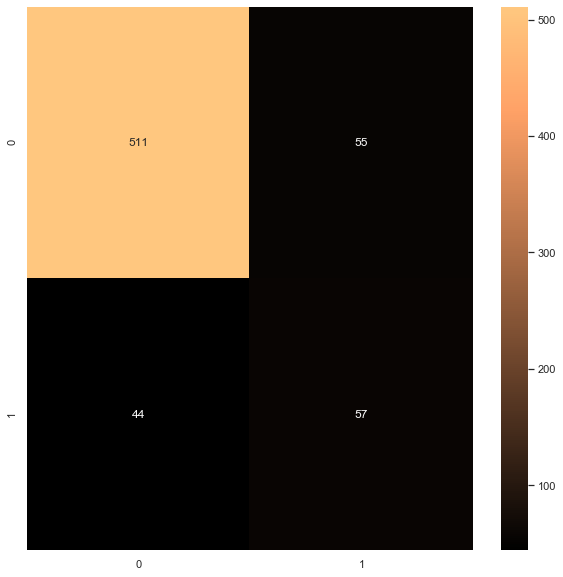


 ---------------------------------------- 
 LogisticRegression 
 ----------------------------------------
TRAINING DATA


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg


Cross-validation recall scores: [0.89473684 0.63157895 0.64102564 0.82051282 0.65789474 0.63157895
 0.42105263 0.73684211 0.71052632 0.78947368]
Mean recall score: 0.6935222672064778

TESTING DATA

Recall: 0.6831683168316832


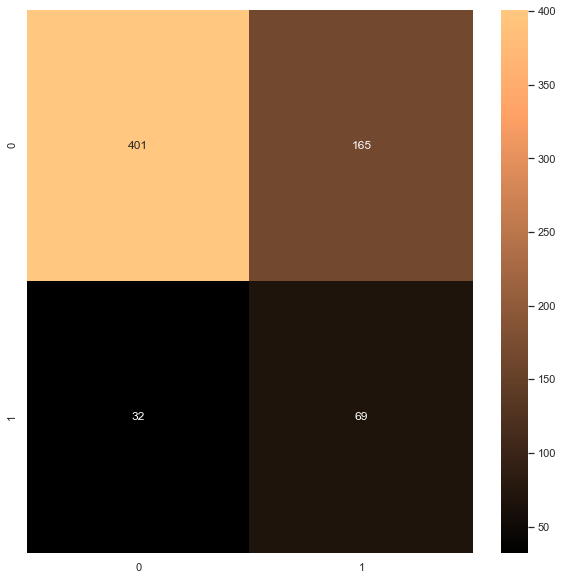


 ---------------------------------------- 
 DecisionTreeClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.81578947 0.76315789 0.69230769 0.82051282 0.89473684 0.81578947
 0.71052632 0.81578947 0.81578947 0.89473684]
Mean recall score: 0.8039136302294198

TESTING DATA

Recall: 0.8118811881188119


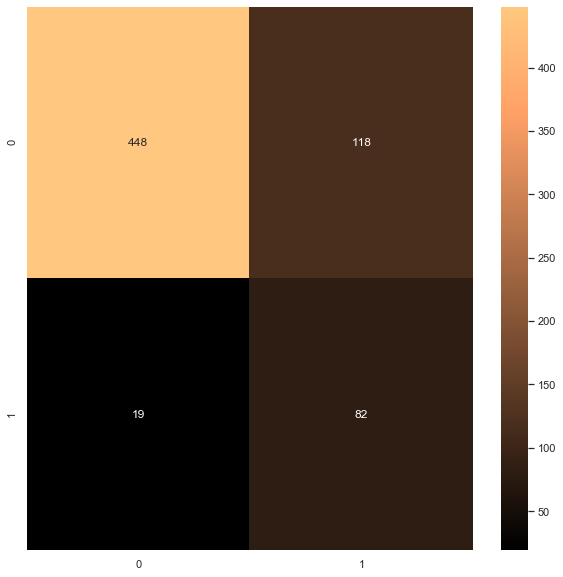


 ---------------------------------------- 
 KNeighborsClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.60526316 0.5        0.56410256 0.56410256 0.57894737 0.63157895
 0.60526316 0.47368421 0.47368421 0.63157895]
Mean recall score: 0.5628205128205128

TESTING DATA

Recall: 0.7425742574257426


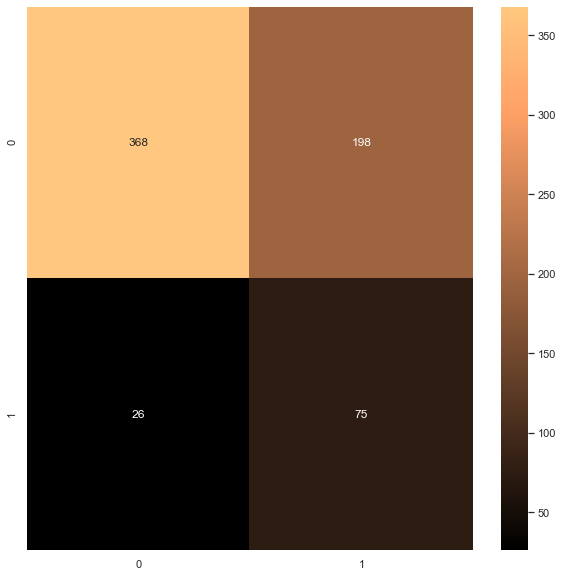


 ---------------------------------------- 
 RandomForestClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.86842105 0.84210526 0.74358974 0.94871795 0.89473684 0.81578947
 0.68421053 0.84210526 0.86842105 0.84210526]
Mean recall score: 0.8350202429149796

TESTING DATA

Recall: 0.8613861386138614


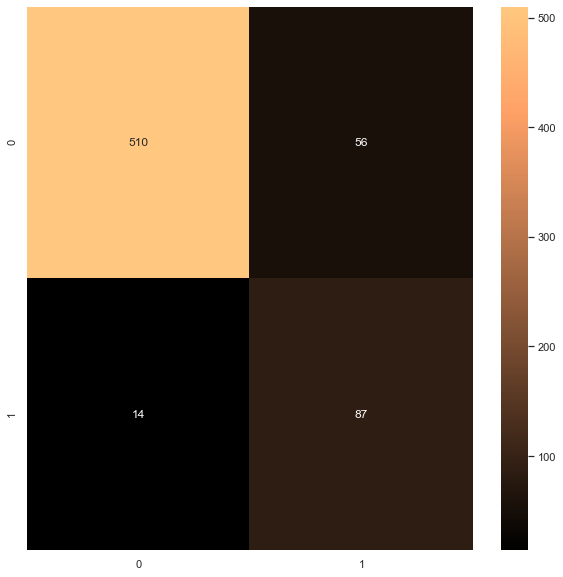


 ---------------------------------------- 
 AdaBoostClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.86842105 0.63157895 0.74358974 0.94871795 0.84210526 0.71052632
 0.63157895 0.81578947 0.73684211 0.78947368]
Mean recall score: 0.7718623481781377

TESTING DATA

Recall: 0.801980198019802


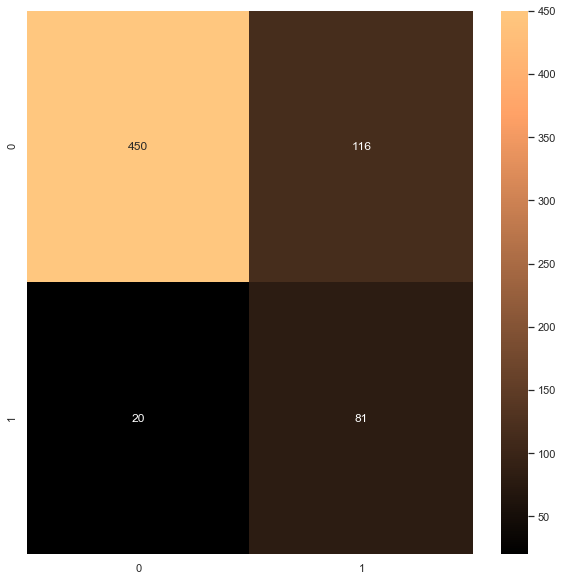


 ---------------------------------------- 
 GradientBoostingClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.86842105 0.84210526 0.74358974 0.92307692 0.86842105 0.84210526
 0.71052632 0.81578947 0.86842105 0.86842105]
Mean recall score: 0.8350877192982455

TESTING DATA

Recall: 0.8415841584158416


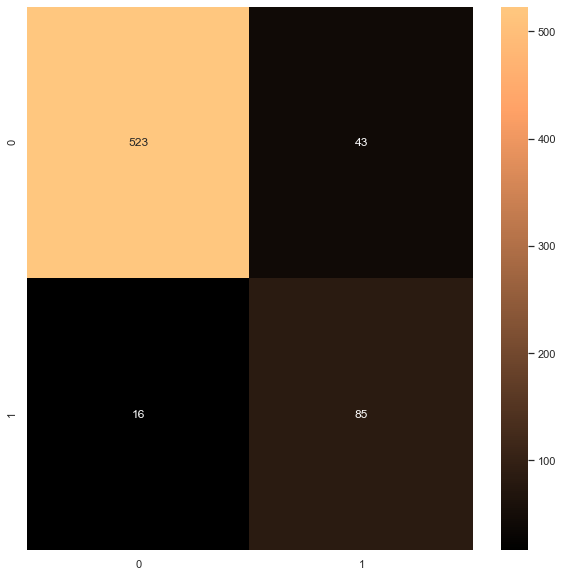

In [95]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier

classifiers = [SVC(max_iter=1000),LogisticRegression(),
               DecisionTreeClassifier(),KNeighborsClassifier(), 
               RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for clf in classifiers:    
    
    print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)
    
    print("TRAINING DATA")
    train_cv = cross_val_score(X=X_train_bal, y=y_train_bal, 
                               estimator=clf, scoring=recall,cv=10)
    print("\nCross-validation recall scores:",train_cv)
    print("Mean recall score:",train_cv.mean())

    print("\nTESTING DATA")
    y_pred = clf.fit(X_train_bal, y_train_bal).predict(X_test)
    print("\nRecall:",recall_score(y_test,y_pred))
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix, annot=True,fmt='d')
    plt.show()
    
    # Store results
    performance.loc[clf.__class__.__name__+'_default',
                    ['Train_Recall','Test_Recall','Test_Specificity']] = [
        train_cv.mean(),
        recall_score(y_test,y_pred),
        conf_matrix[0,0]/conf_matrix[0,:].sum()
    ]

In [96]:
performance

,Train_Recall,Test_Recall,Test_Specificity
SVC_default,0.436707,0.564356,0.902827
LogisticRegression_default,0.693522,0.683168,0.708481
DecisionTreeClassifier_default,0.803914,0.811881,0.791519
KNeighborsClassifier_default,0.562821,0.742574,0.650177
RandomForestClassifier_default,0.83502,0.861386,0.90106
AdaBoostClassifier_default,0.771862,0.80198,0.795053
GradientBoostingClassifier_default,0.835088,0.841584,0.924028


## Scale Data

- StandardScaler

In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# X_train_bal, y_train_bal, X_test, y_test
ss = StandardScaler()

X_train_bal_sc = ss.fit_transform(X_train_bal)
X_test_sc = ss.transform(X_test)


 ---------------------------------------- 
 SVC 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.94736842 0.86842105 0.71794872 0.92307692 0.89473684 0.84210526
 0.71052632 0.81578947 0.81578947 0.78947368]
Mean recall score: 0.832523616734143

TEST GROUP

Recall: 0.8514851485148515


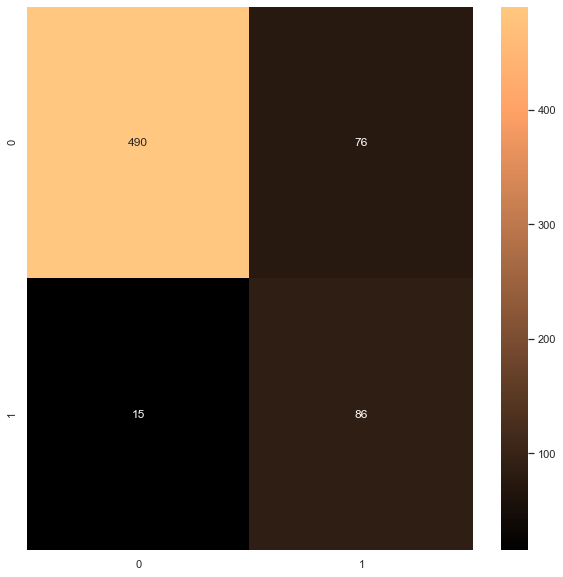


 ---------------------------------------- 
 LogisticRegression 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.78947368 0.73684211 0.69230769 0.84615385 0.68421053 0.71052632
 0.5        0.84210526 0.76315789 0.78947368]
Mean recall score: 0.7354251012145749

TEST GROUP

Recall: 0.7623762376237624


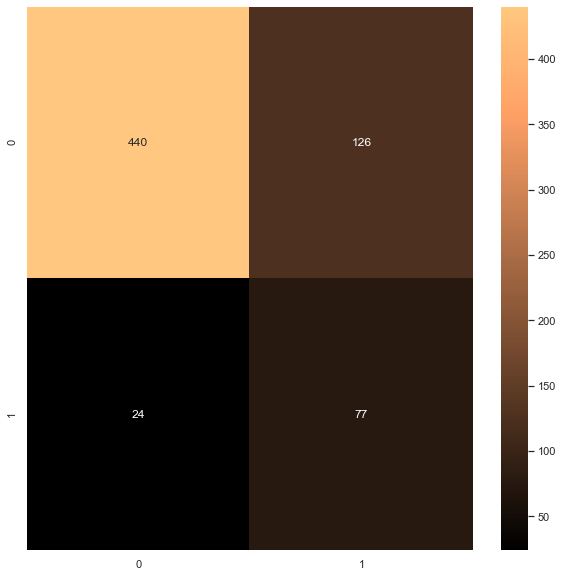


 ---------------------------------------- 
 DecisionTreeClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.81578947 0.71052632 0.69230769 0.79487179 0.94736842 0.78947368
 0.71052632 0.78947368 0.84210526 0.89473684]
Mean recall score: 0.7987179487179488

TEST GROUP

Recall: 0.8316831683168316


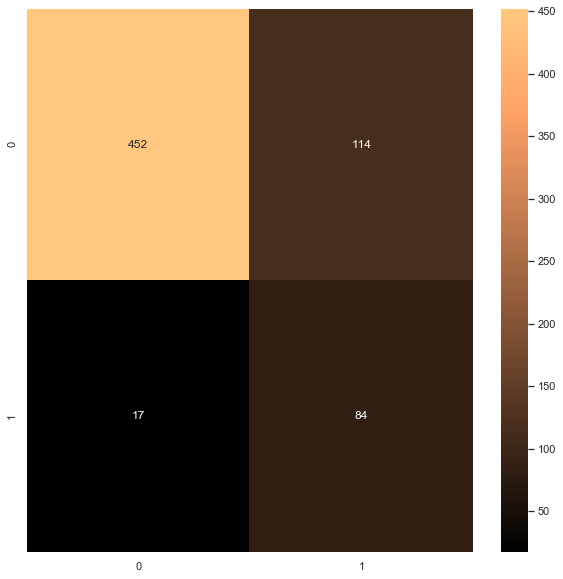


 ---------------------------------------- 
 KNeighborsClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.65789474 0.71052632 0.66666667 0.76923077 0.78947368 0.73684211
 0.71052632 0.71052632 0.71052632 0.73684211]
Mean recall score: 0.7199055330634277

TEST GROUP

Recall: 0.7821782178217822


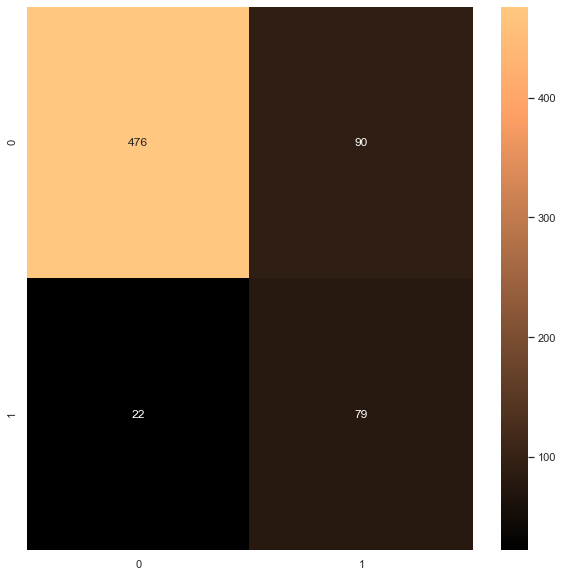


 ---------------------------------------- 
 RandomForestClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.89473684 0.84210526 0.74358974 0.94871795 0.89473684 0.81578947
 0.68421053 0.84210526 0.86842105 0.86842105]
Mean recall score: 0.8402834008097166

TEST GROUP

Recall: 0.8613861386138614


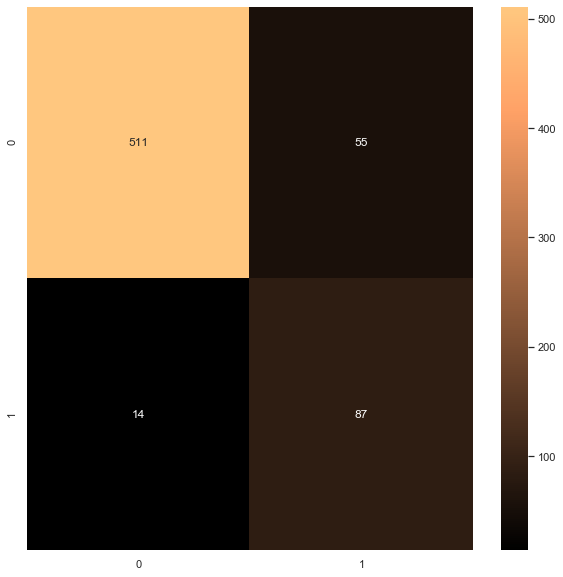


 ---------------------------------------- 
 AdaBoostClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.86842105 0.63157895 0.74358974 0.94871795 0.84210526 0.71052632
 0.63157895 0.81578947 0.73684211 0.78947368]
Mean recall score: 0.7718623481781377

TEST GROUP

Recall: 0.801980198019802


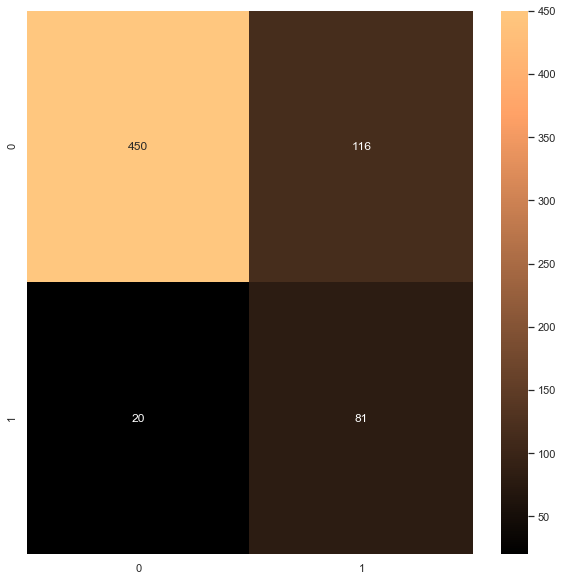


 ---------------------------------------- 
 GradientBoostingClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.86842105 0.84210526 0.74358974 0.92307692 0.86842105 0.84210526
 0.71052632 0.81578947 0.86842105 0.86842105]
Mean recall score: 0.8350877192982455

TEST GROUP

Recall: 0.8415841584158416


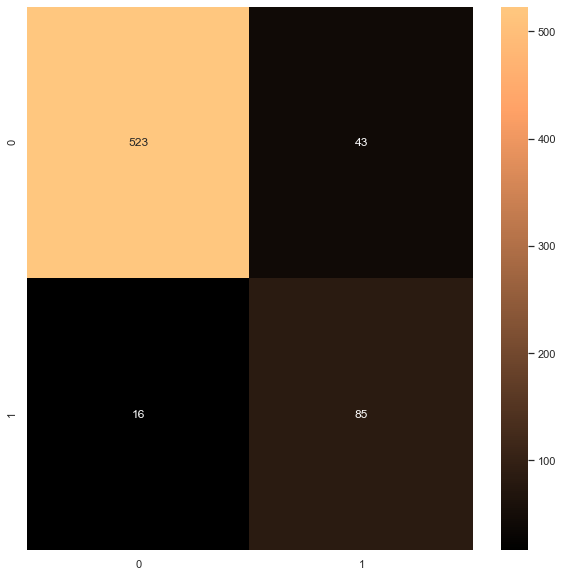

In [98]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier

classifiers = [SVC(max_iter=1000),LogisticRegression(),
               DecisionTreeClassifier(),KNeighborsClassifier(), 
               RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for clf in classifiers:    
    
    print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)
    
    print("TRAINING DATA")
    train_cv = cross_val_score(X=X_train_bal_sc, y=y_train_bal, 
                               estimator=clf, scoring=recall,cv=10)
    print("\nCross-validation recall scores:",train_cv)
    print("Mean recall score:",train_cv.mean())

    print("\nTESTING DATA")
    y_pred = clf.fit(X_train_bal_sc, y_train_bal).predict(X_test_sc)
    print("\nRecall:",recall_score(y_test,y_pred))
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix, annot=True,fmt='d')
    plt.show()
    
    # Store results
    performance.loc[clf.__class__.__name__+'_default',
                    ['Train_Recall','Test_Recall','Test_Specificity']] = [
        train_cv.mean(),
        recall_score(y_test,y_pred),
        conf_matrix[0,0]/conf_matrix[0,:].sum()
    ]

- MinMaxScaler

In [99]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# X_train_bal, y_train_bal, X_test, y_test
mm = MinMaxScaler()

X_train_bal_sc = mm.fit_transform(X_train_bal)
X_test_sc = mm.transform(X_test)


 ---------------------------------------- 
 SVC 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.89473684 0.84210526 0.74358974 0.94871795 0.92105263 0.86842105
 0.71052632 0.81578947 0.81578947 0.78947368]
Mean recall score: 0.8350202429149798

TESTING DATA

Recall: 0.8811881188118812


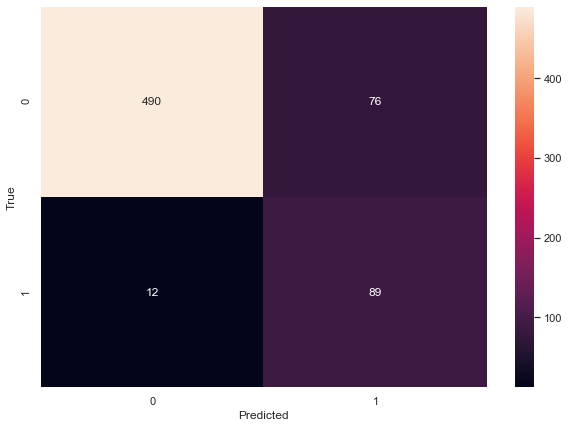


 ---------------------------------------- 
 LogisticRegression 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.73684211 0.73684211 0.69230769 0.87179487 0.68421053 0.71052632
 0.52631579 0.81578947 0.73684211 0.81578947]
Mean recall score: 0.7327260458839406

TESTING DATA

Recall: 0.7524752475247525


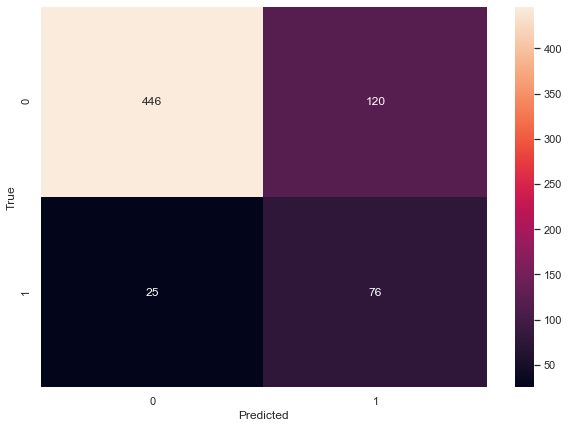


 ---------------------------------------- 
 DecisionTreeClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.81578947 0.73684211 0.71794872 0.79487179 0.92105263 0.81578947
 0.71052632 0.78947368 0.84210526 0.86842105]
Mean recall score: 0.8012820512820513

TESTING DATA

Recall: 0.801980198019802


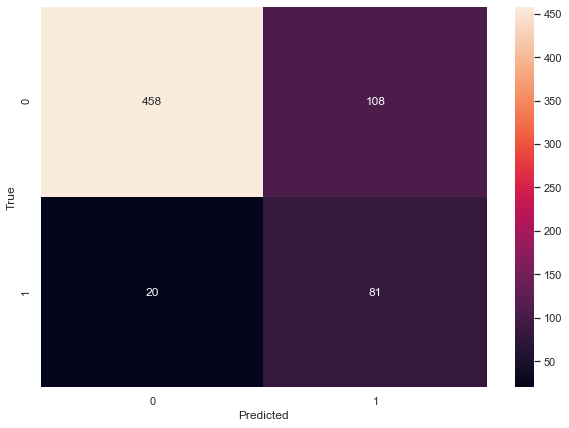


 ---------------------------------------- 
 KNeighborsClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.78947368 0.71052632 0.66666667 0.82051282 0.73684211 0.78947368
 0.68421053 0.68421053 0.73684211 0.73684211]
Mean recall score: 0.7355600539811065

TESTING DATA

Recall: 0.7920792079207921


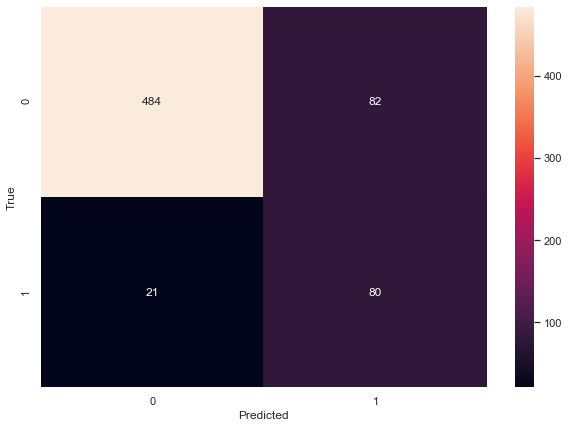


 ---------------------------------------- 
 RandomForestClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.89473684 0.84210526 0.74358974 0.94871795 0.89473684 0.81578947
 0.68421053 0.81578947 0.86842105 0.86842105]
Mean recall score: 0.8376518218623481

TESTING DATA

Recall: 0.8613861386138614


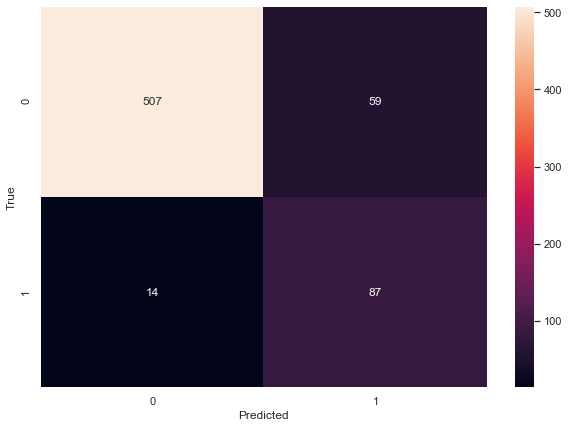


 ---------------------------------------- 
 AdaBoostClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.86842105 0.63157895 0.74358974 0.94871795 0.84210526 0.71052632
 0.63157895 0.81578947 0.73684211 0.78947368]
Mean recall score: 0.7718623481781377

TESTING DATA

Recall: 0.801980198019802


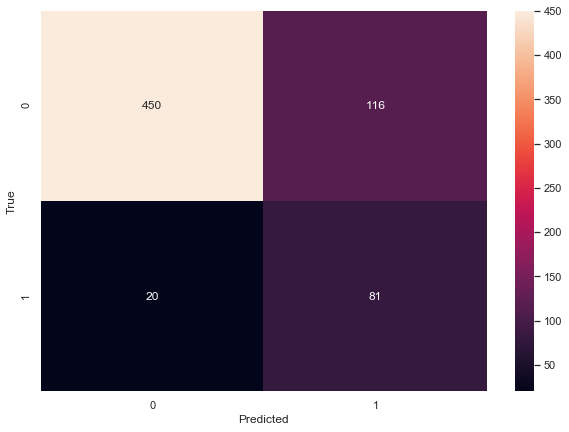


 ---------------------------------------- 
 GradientBoostingClassifier 
 ----------------------------------------
TRAINING DATA

Cross-validation recall scores: [0.86842105 0.84210526 0.74358974 0.92307692 0.86842105 0.84210526
 0.71052632 0.81578947 0.86842105 0.86842105]
Mean recall score: 0.8350877192982455

TESTING DATA

Recall: 0.8415841584158416


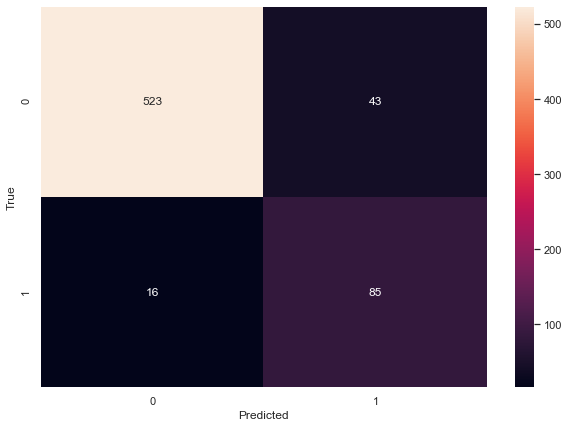

In [100]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier

classifiers = [SVC(max_iter=1000),LogisticRegression(),
               DecisionTreeClassifier(),KNeighborsClassifier(), 
               RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for clf in classifiers:    
    
    print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)
    
    print("TRAINING DATA")
    train_cv = cross_val_score(X=X_train_bal_sc, y=y_train_bal, 
                               estimator=clf, scoring=recall,cv=10)
    print("\nCross-validation recall scores:",train_cv)
    print("Mean recall score:",train_cv.mean())

    print("\nTESTING DATA")
    y_pred = clf.fit(X_train_bal_sc, y_train_bal).predict(X_test_sc)
    print("\nRecall:",recall_score(y_test,y_pred))
    
    # Print confusion matrix
    fig = plt.figure(figsize = (10,7))
    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix, annot=True,fmt='d')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    
    # Store results
    performance.loc[clf.__class__.__name__+'_default',
                    ['Train_Recall','Test_Recall','Test_Specificity']] = [
        train_cv.mean(),
        recall_score(y_test,y_pred),
        conf_matrix[0,0]/conf_matrix[0,:].sum()
    ]

In [101]:
performance

,Train_Recall,Test_Recall,Test_Specificity
SVC_default,0.83502,0.881188,0.865724
LogisticRegression_default,0.732726,0.752475,0.787986
DecisionTreeClassifier_default,0.801282,0.80198,0.809187
KNeighborsClassifier_default,0.73556,0.792079,0.855124
RandomForestClassifier_default,0.837652,0.861386,0.89576
AdaBoostClassifier_default,0.771862,0.80198,0.795053
GradientBoostingClassifier_default,0.835088,0.841584,0.924028


## Hyperparameter Tuning


 ---------------------------------------- 
 LogisticRegression 
 ----------------------------------------
Best parameters: 

 {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} 

TRAINING DATA

Cross-validation recall scores: [0.20472441 0.203125   0.17322835]
Mean recall score: 0.19369258530183728

TESTING DATA

Recall: 0.15841584158415842
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.55      0.16      0.25       101

    accuracy                           0.85       667
   macro avg       0.71      0.57      0.58       667
weighted avg       0.82      0.85      0.82       667



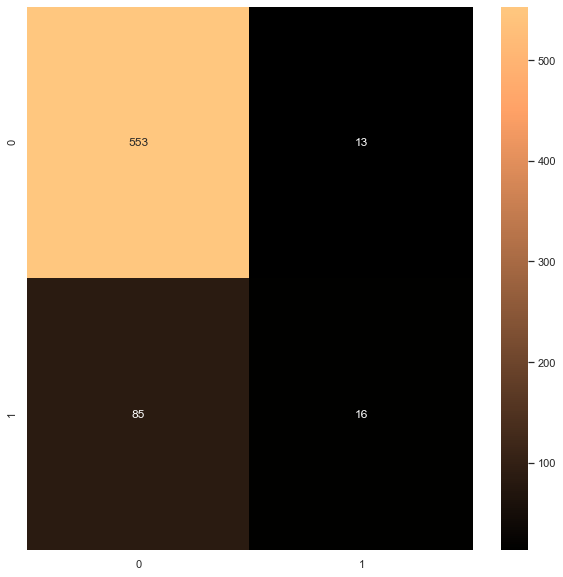

In [103]:
from sklearn.model_selection import GridSearchCV
# Parameters to optimize
params = [{
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'C': [0.3, 0.5, 0.7, 1],
    'penalty': ['l2']
    },{
    'solver': ['liblinear','saga'],
    'C': [0.3, 0.5, 0.7, 1],
    'penalty': ['l1','l2']
}]

clf = LogisticRegression(max_iter=5000,n_jobs=-1)

# Load GridSearchCV
search = GridSearchCV(
    estimator=clf,
    param_grid=params,
    n_jobs=-1,
    scoring=recall
)

search.fit(X_train, y_train)

print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)

best = search.best_estimator_
print('Best parameters: \n\n',search.best_params_,'\n')

print("TRAINING DATA")
train_cv = cross_val_score(X=X_train, y=y_train, estimator=best, scoring=recall,cv=3)
print("\nCross-validation recall scores:",train_cv)
print("Mean recall score:",train_cv.mean())

print("\nTESTING DATA")
y_pred = best.fit(X_train, y_train).predict(X_test)
print("\nRecall:",recall_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()
    
# Store results
performance.loc[clf.__class__.__name__+'_search',
                ['Train_Recall','Test_Recall','Test_Specificity']] = [train_cv.mean(),
                                                                      recall_score(y_test,y_pred),
                                                                      conf_matrix[0,0]/conf_matrix[0,:].sum()]

In [105]:
params = {
    'criterion':['gini','entropy'],
    'max_features':[None,'sqrt'],
    'class_weight':[{1:1,0:0.3},{1:1,0:0.5},{1:1,0:0.7}]
    }

clf = DecisionTreeClassifier(
)


# K-Nearest Neighbors

### 1A. Initial KNN model
- MinMaxScaler
- Kfold cross validation

In [ ]:
fsm_knn = KNN.knnModel(X, y, random_state=42)

In [ ]:
k_scores_train, k_scores_val = fsm_knn.KNN_train()

In [ ]:
fsm_knn_params = fsm_knn.KNN_tune_gridsearch()